## Milestone 1 <a class="anchor" id="Milestone 1"></a>

Identify an original business problem for your project that can be solved with an appropriate model. 
By a business problem, it is meant that you should work on a problem where there is a good reason to solve it. 
There should be some organization or company that would find the solution to the problem useful. 

The second step is locating your data. This can come from a variety of sources, e.g., Kaggle, your job, a website, API, etc.

Begin Milestone 1 with a 250-500-word narrative describing your original idea for the analysis/model building business problem. 
Clearly identify the problem you will address and the target for your model. 
Then, do a graphical analysis creating a minimum of four graphs.
Label your graphs appropriately and explain/analyze the information provided by each graph. 
Your analysis should begin to answer the question(s) you are addressing. 
Write a short overview/conclusion of the insights gained from your graphical analysis.

My Milestone 1 Idea

For my final project, I would like to conduct an in-depth analysis of textual reviews for three different Disneyland locations: 
Disneyland California, Disneyland Paris, and Hong Kong Disneyland. To accomplish this, I will be utilizing a dataset that I found 
on Kaggle (https://www.kaggle.com/datasets/arushchillar/disneyland-reviews/data).

Disneyland resorts are renowned as some of the most popular vacation destinations in the world. 
However, there is always room for improvement, and it is essential to identify areas of both opportunity and success within each of these resorts. 
By delving into the textual data of the reviews, my objective is to identify the aspects of the parks that are frequently praised by visitors and those that are commonly criticized. 
This analysis will provide valuable insights into what areas require attention and improvement, allowing the resorts to address the concerns mentioned in the reviews effectively. 
Additionally, it will help highlight the aspects of the parks that are highly appreciated by visitors, enabling Disney to prioritize and maintain these positive attributes as well as expand them to other branches.

To achieve the aforementioned goals, I plan to develop a natural language processing (NLP) model and employ sentiment analysis techniques. The NLP model will enable me to extract meaningful information from the textual reviews, while sentiment analysis will help me to quantify the positive and negative sentiments expressed in each review. By delving into the textual data of the reviews, my objective is to identify the aspects of the parks that are frequently praised by visitors and those that are commonly criticized. The ratings given by the reviewer themselves may not be reflective of the sentiments expressed in the actual text of the review, so I'm hoping to find a better means of evaluating the content of these reviews using NLTK VADER and regression analysis.
My hope is that after training the regression model, it will be able to predict the sentiment ratings for new, unseen reviews, and as a result, flag ones that may be of importance in addressing concerns about the park. 

The findings and recommendations derived from this analysis can serve as a foundation for future improvements and strategic decision-making, helping to ensure that visitors have a memorable and enjoyable experience at these iconic theme parks.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

import warnings
warnings.filterwarnings('ignore')


In [2]:
# Graphical Analysis - minimum of 4 graphs, clearly labeled
df = pd.read_csv('DisneylandReviews.csv', encoding='latin-1')

df.head(10)

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong
5,670591897,3,2019-4,Singapore,"Have been to Disney World, Disneyland Anaheim ...",Disneyland_HongKong
6,670585330,5,2019-4,India,Great place! Your day will go by and you won't...,Disneyland_HongKong
7,670574142,3,2019-3,Malaysia,Think of it as an intro to Disney magic for th...,Disneyland_HongKong
8,670571027,2,2019-4,Australia,"Feel so let down with this place,the Disneylan...",Disneyland_HongKong
9,670570869,5,2019-3,India,I can go on talking about Disneyland. Whatever...,Disneyland_HongKong


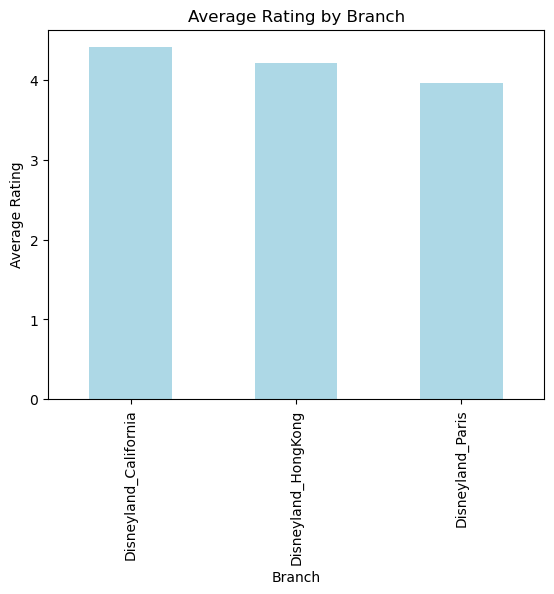

In [3]:
## Graph 1 - Bar Chart of Average Ratings by Branch 

branch_ratings = df.groupby('Branch')['Rating'].mean()
branch_ratings.plot(kind='bar', color='lightblue')
plt.title('Average Rating by Branch')
plt.xlabel('Branch')
plt.ylabel('Average Rating')
plt.show()


<Axes: title={'center': 'Rating'}, xlabel='Branch'>

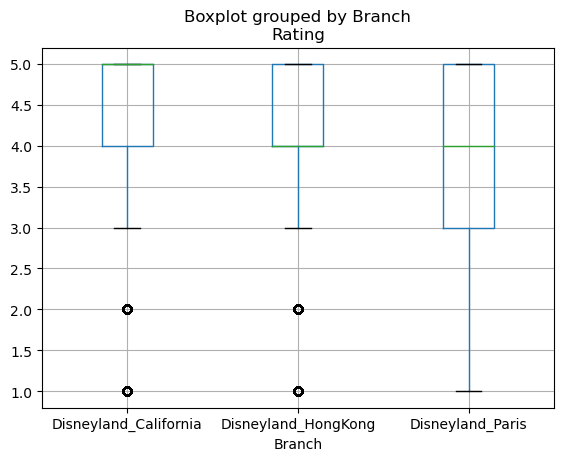

In [4]:
## Graph 2 - Boxplot of Ratings Grouped by Branch

df.boxplot('Rating', by='Branch')


<Figure size 1400x800 with 0 Axes>

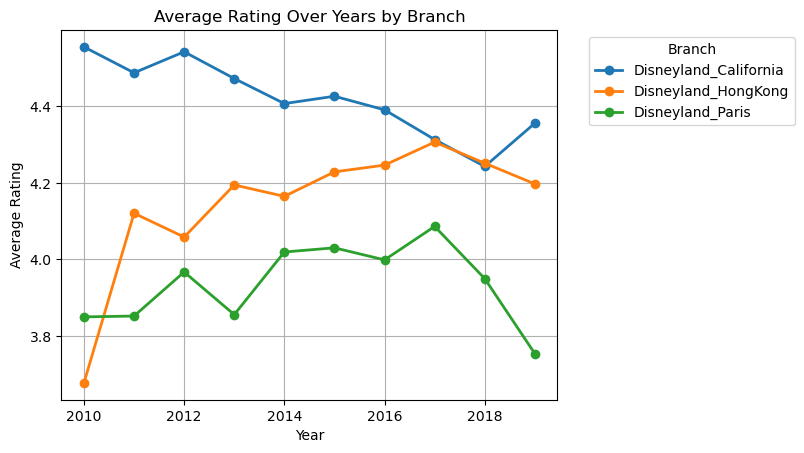

In [5]:
## Graph 3 - Line Chart of Average Rating Over the Years By Branch

df = df[df['Year_Month'] != 'missing']

## Dividing up the Year_Month variable into separate year and month variables in datetime 
df['Year_Month'] = pd.to_datetime(df['Year_Month'], errors='coerce')
df['Year_Month'] = df['Year_Month'].dt.to_period('M')
df['Year'] = df['Year_Month'].dt.year

## Finding mean rating each year by branch
average_rating_per_year_branch = df.groupby(['Year', 'Branch'])['Rating'].mean().unstack()

## Plotting the timeline chart
plt.figure(figsize=(14, 8))
average_rating_per_year_branch.plot(marker='o', linewidth=2)
plt.title('Average Rating Over Years by Branch')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.legend(title='Branch', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


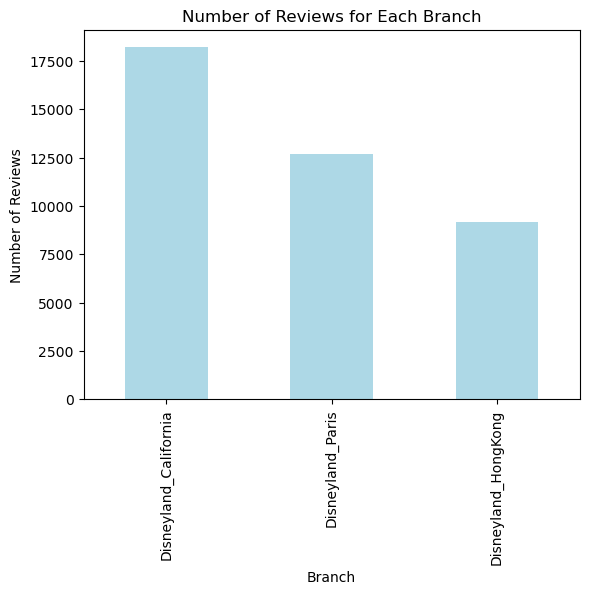

In [6]:
## Graph 4 - Bar Chart of Review Counts for Each Branch

rating_amounts = df['Branch'].value_counts()
rating_amounts.plot(kind='bar', color='lightblue')
plt.title('Number of Reviews for Each Branch')
plt.xlabel('Branch')
plt.ylabel('Number of Reviews')
plt.show()


In [9]:
# Explaination/Analysis of Graphs
## Since I have yet to work with the sentiment analysis, 
## I mainly did graphs related to the different ratings based on various factors in each review.

## Graph 1 - Bar Chart of Average Ratings by Branch 
'''
I wanted to examine how the average rating scores for each branch - Disneyland California, Disneyland Paris, and Tokyo Disneyland compared.
Disneyland CA held the highest average score on the 1-5 scale, followed by Hong Kong Disneyland, and Disneyland Paris had the lowest 
average of the three branches. Branches like Disneyland California consistently receive higher ratings and positive reviews, 
which may be an indicator of successful practices and areas of strength that can be replicated or emphasized in the other branches. This will need
to be further explored with the NLP model and sentiment analysis to uncover what exactly is commented on positively in the Disneyland California reviews.
'''

## Graph 2 - Boxplot of Ratings Grouped by Branch
'''
I wanted to get a better picture of the distribution of the ratings and any outliers for each of the three branches after viewing the average 
score for each.  The lower scores (scores of 1 or 2) for both Disneyland California and Hong Kong Disneyland were identified as outliers, 
however, Disneyland Paris's lower scores showed as falling within the first quartile. 
'''

## Graph 3 - Line Chart of Average Rating Over the Years By Branch
'''
I also wanted to examine how the average rating of each brand may have varied over the years the data was collected.
Each of the 3 branches had a different pattern of change in review scores over the past 10 years. If anything, Hong Kong Disneyland and 
Disneyland Paris are the two parks that most closely resembled each other, but even then, there were some differences in change.
One of the main indicators of this was that Disneyland Paris experienced a sharp drop in average ratings from 2017-2019.
Another point of interest was the very low average rating for Hong Kong Disneyland in 2010 - the lowest average rating across all parks and years.
This point in time is worth taking a more in-depth look at during further analysis; what was happening during this time that led to such low ratings,
and were these complaints addressed in later years, leading to increased ratings later on?
'''

## Graph 4 - Bar Chart of Review Counts for Each Branch
'''
Something I also wanted to look at was the distribution of ratings across the 3 branches. Disneyland California reviews represent
almost half of the dataset. The amount of reviews for Hong Kong Disneyland is roughly half of that amount. This may be due to the popularity and 
potentially greater visibility of Disneyland California. Hong Kong Disneyland is also the smallest of the 6 Disney theme parks, so the lower number
of reviews also makes sense given this information. 
''';

# Milestone 2

Now that you have created your idea, located data, and have started your graphical analysis, you will move on to the data preparation process of your project. After completing Milestone 2, your data should be ready for the model building/evaluation phase.

Here is a list of steps to consider performing in Milestone 2:
- Drop any features that are not useful for your model building and explain why they are not useful.
- Perform any data extraction/selection steps.
- Transform features if necessary.
- Engineer new useful features.
- Deal with missing data (do not just drop rows or columns without justifying this).
- Create dummy variables if necessary.

Explain your process at each step. You can use any methods/tools you think are most appropriate. Do what makes the most sense for your data/problem. This will vary greatly among different projects. Be careful to avoid data snooping in these steps.


Ideas:
- Drop any features that are not useful for your model building and explain why they are not useful.
    - checking for duplicate values
    - dropping date
- Perform any data extraction/selection steps.
    - separating into df by park(?)
- Transform features if necessary.
    - convert text to lowercase, remove punctuation, special characters, stop words
- Engineer new useful features.
    - reworking date data
- Deal with missing data (do not just drop rows or columns without justifying this).
    - checking for missing values
- Create dummy variables if necessary.

In [7]:
## Loading the data
df = pd.read_csv('DisneylandReviews.csv', encoding='latin-1')

df.head(10)

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong
5,670591897,3,2019-4,Singapore,"Have been to Disney World, Disneyland Anaheim ...",Disneyland_HongKong
6,670585330,5,2019-4,India,Great place! Your day will go by and you won't...,Disneyland_HongKong
7,670574142,3,2019-3,Malaysia,Think of it as an intro to Disney magic for th...,Disneyland_HongKong
8,670571027,2,2019-4,Australia,"Feel so let down with this place,the Disneylan...",Disneyland_HongKong
9,670570869,5,2019-3,India,I can go on talking about Disneyland. Whatever...,Disneyland_HongKong


In [8]:
## Examining the content and data types of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42656 entries, 0 to 42655
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Review_ID          42656 non-null  int64 
 1   Rating             42656 non-null  int64 
 2   Year_Month         42656 non-null  object
 3   Reviewer_Location  42656 non-null  object
 4   Review_Text        42656 non-null  object
 5   Branch             42656 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.0+ MB


In [9]:
## Step: Searching for Duplicate Text Reviews
## Explanation: I went through and searched for duplicate records, then dropped any multiple occurences so that 
## it would not skew the data or possibly lead to incorrect insights.

df.duplicated().sum()

12

In [10]:
df.drop_duplicates(keep='first', inplace=True)
df

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong
...,...,...,...,...,...,...
42651,1765031,5,missing,United Kingdom,i went to disneyland paris in july 03 and thou...,Disneyland_Paris
42652,1659553,5,missing,Canada,2 adults and 1 child of 11 visited Disneyland ...,Disneyland_Paris
42653,1645894,5,missing,South Africa,My eleven year old daughter and myself went to...,Disneyland_Paris
42654,1618637,4,missing,United States,"This hotel, part of the Disneyland Paris compl...",Disneyland_Paris


In [11]:
## Step: Checking for missing data
## Explanation: I wanted to make sure there were no missing values that may affect use of the model later on, so I did
## a quick check of each column in the dataframe to see if any needed to be addressed. 

df.isnull().sum()

Review_ID            0
Rating               0
Year_Month           0
Reviewer_Location    0
Review_Text          0
Branch               0
dtype: int64

In [12]:
## Step: Transforming text data
## Explanation: I needed to process the raw text reviews into a format that would be usable with sentiment analysis, so I 
## adjusted the casing, removed punctuation and stop words, and lemmatized and tokenized the reviews into a new column.

### Making lowercase
df["Review_Text"] = df["Review_Text"].apply(lambda x : ' '.join(x.lower() for x in x.split()))
df.head()


,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,if you've ever been to disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,its been a while since d last time we visit hk...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,thanks god it wasn t too hot or too humid when...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,hk disneyland is a great compact park. unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


In [13]:
### Removing punctuation
df["Review_Text"] = df["Review_Text"].str.replace("[^\w\s]","")
df.head()


,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,if youve ever been to disneyland anywhere youl...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,its been a while since d last time we visit hk...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,thanks god it wasn t too hot or too humid when...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,hk disneyland is a great compact park unfortun...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,the location is not in the city took around 1 ...,Disneyland_HongKong


In [14]:
### Removing stop words
import nltk
from nltk.corpus import stopwords

stop = stopwords.words('english')
df["Review_Text"] = df["Review_Text"].apply(lambda x : " ".join(x for x in x.split() if x not in stop))
df.head()
 

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,youve ever disneyland anywhere youll find disn...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,since last time visit hk disneyland yet time s...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,thanks god hot humid visiting park otherwise w...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,hk disneyland great compact park unfortunately...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,location city took around 1 hour kowlon kids l...,Disneyland_HongKong


In [15]:
### Using Lemmatization over Stemming in order to preserve some more of the actual meaning.
from textblob import Word
df["Review_Text"] = df["Review_Text"].apply(lambda x: " ".join([Word(x).lemmatize()]))
df.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,youve ever disneyland anywhere youll find disn...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,since last time visit hk disneyland yet time s...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,thanks god hot humid visiting park otherwise w...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,hk disneyland great compact park unfortunately...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,location city took around 1 hour kowlon kids l...,Disneyland_HongKong


In [16]:
### Tokenizing Review Text
from textblob import TextBlob

df["Tokens"] = df["Review_Text"].apply(lambda x: TextBlob(x).words)

In [17]:
df.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,Tokens
0,670772142,4,2019-4,Australia,youve ever disneyland anywhere youll find disn...,Disneyland_HongKong,"[youve, ever, disneyland, anywhere, youll, fin..."
1,670682799,4,2019-5,Philippines,since last time visit hk disneyland yet time s...,Disneyland_HongKong,"[since, last, time, visit, hk, disneyland, yet..."
2,670623270,4,2019-4,United Arab Emirates,thanks god hot humid visiting park otherwise w...,Disneyland_HongKong,"[thanks, god, hot, humid, visiting, park, othe..."
3,670607911,4,2019-4,Australia,hk disneyland great compact park unfortunately...,Disneyland_HongKong,"[hk, disneyland, great, compact, park, unfortu..."
4,670607296,4,2019-4,United Kingdom,location city took around 1 hour kowlon kids l...,Disneyland_HongKong,"[location, city, took, around, 1, hour, kowlon..."


In [18]:
## Step: Separating Year and Month into separate variables. 
## Explanation: I decided to isolate the date of each review into a more usable format, since the hyphen posed an issue with some of my graphs in Milestone 1.
## I split the string by the hyphen and stored them in a new dataframe, then added the columns to the main dataframe. 

dates = df['Year_Month'].str.split('-',expand=True, n=1)
df['Year'] = dates[0]
df['Month'] = dates[1]

## Dropping the original Year_Month variable
df.drop('Year_Month', axis=1, inplace=True)

In [19]:
df.head()

,Review_ID,Rating,Reviewer_Location,Review_Text,Branch,Tokens,Year,Month
0,670772142,4,Australia,youve ever disneyland anywhere youll find disn...,Disneyland_HongKong,"[youve, ever, disneyland, anywhere, youll, fin...",2019,4
1,670682799,4,Philippines,since last time visit hk disneyland yet time s...,Disneyland_HongKong,"[since, last, time, visit, hk, disneyland, yet...",2019,5
2,670623270,4,United Arab Emirates,thanks god hot humid visiting park otherwise w...,Disneyland_HongKong,"[thanks, god, hot, humid, visiting, park, othe...",2019,4
3,670607911,4,Australia,hk disneyland great compact park unfortunately...,Disneyland_HongKong,"[hk, disneyland, great, compact, park, unfortu...",2019,4
4,670607296,4,United Kingdom,location city took around 1 hour kowlon kids l...,Disneyland_HongKong,"[location, city, took, around, 1, hour, kowlon...",2019,4


In [20]:
## Step: Adding separate column for categorizing ranking sentiment from the 'Rating' variable.
## Explanation: I wrote a function to return the sentiments in a new column as 'positive', 'negative', or 'neutral' as a comparison point
## for scores using NLTK Vader sentiment analysis later on. 

def sentiment(score):
    if score > 3:
        return 'Positive'
    elif score == 3:
        return 'Neutral'
    else:
        return 'Negative'
  

In [21]:
### Adding new column for sentiment, applied based off of the 'Rating' column
df['Sentiment'] = df['Rating'].apply(sentiment)

In [22]:
df.head()

,Review_ID,Rating,Reviewer_Location,Review_Text,Branch,Tokens,Year,Month,Sentiment
0,670772142,4,Australia,youve ever disneyland anywhere youll find disn...,Disneyland_HongKong,"[youve, ever, disneyland, anywhere, youll, fin...",2019,4,Positive
1,670682799,4,Philippines,since last time visit hk disneyland yet time s...,Disneyland_HongKong,"[since, last, time, visit, hk, disneyland, yet...",2019,5,Positive
2,670623270,4,United Arab Emirates,thanks god hot humid visiting park otherwise w...,Disneyland_HongKong,"[thanks, god, hot, humid, visiting, park, othe...",2019,4,Positive
3,670607911,4,Australia,hk disneyland great compact park unfortunately...,Disneyland_HongKong,"[hk, disneyland, great, compact, park, unfortu...",2019,4,Positive
4,670607296,4,United Kingdom,location city took around 1 hour kowlon kids l...,Disneyland_HongKong,"[location, city, took, around, 1, hour, kowlon...",2019,4,Positive


Additional Steps Added for Milestone 3 Submission Below.

In [23]:
## If you are using your text data to make your sentiment prediction, 
## then you need to get the text data in a numerical format, i.e., TFIDF-vectorization.

In [24]:
# TF-IDF ( Term Frequency and Inverse Document Frequency )
# Whole Idea to use it is to show how important a word is to a document in an collection

# Term Frequency = Count of word X/ length of sentence

# Inverse Documnet Frequency : log( N/n ), N = total no. of rows , n = no. of row in which word was present

# IDF calculates rareness of the word , if a word is apprearing in all the rows than its useless

from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer()
vectors4 = tv.fit_transform(df['Review_Text'])
print(tv.idf_)
print(tv.vocabulary_)

[ 9.58122377  9.86890584 10.27437095 ...  9.46344074 10.56205302
 10.96751813]
{'youve': 74012, 'ever': 24313, 'disneyland': 20232, 'anywhere': 6576, 'youll': 73879, 'find': 27107, 'hong': 33199, 'kong': 37556, 'similar': 59200, 'layout': 38190, 'walk': 70945, 'main': 40312, 'street': 62228, 'familiar': 26025, 'feel': 26808, 'one': 45794, 'rides': 55502, 'small': 59737, 'world': 73028, 'absolutely': 3760, 'fabulous': 25767, 'worth': 73213, 'day': 17987, 'visited': 70374, 'fairly': 25955, 'hot': 33416, 'relatively': 54239, 'busy': 11819, 'queues': 52708, 'moved': 43438, 'well': 71883, 'since': 59254, 'last': 37996, 'time': 65796, 'visit': 70344, 'hk': 32692, 'yet': 73746, 'stay': 61739, 'tomorrowland': 66652, 'aka': 5282, 'marvel': 40901, 'landnow': 37846, 'iron': 35834, 'man': 40485, 'experience': 25301, 'newly': 44328, 'open': 46086, 'ant': 6389, 'waspironman': 71284, 'great': 30740, 'feature': 26756, 'exciting': 24811, 'especially': 23813, 'whole': 72379, 'scenery': 57175, 'central':

In [25]:
## Vader scores
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

senti_analyzer=SentimentIntensityAnalyzer()


In [26]:
v_scores = []

for i in df['Review_Text']:
    score = senti_analyzer.polarity_scores(i)
    v_scores.append(score['compound'])

In [27]:
df['VADER_score'] = v_scores
df.groupby("Rating")["VADER_score"].describe()

,count,mean,std,min,25%,50%,75%,max
Rating,,,,,,,,
1,1499.0,0.099916,0.701619,-0.9933,-0.62560,0.2263,0.80660,0.9988
2,2127.0,0.340484,0.636511,-0.9861,-0.18120,0.5859,0.89795,0.9980
3,5107.0,0.540256,0.535551,-0.9787,0.29835,0.7962,0.93660,0.9990
4,10771.0,0.756916,0.354619,-0.9925,0.72690,0.9022,0.96380,0.9998
5,23140.0,0.809675,0.278699,-0.9313,0.78450,0.9169,0.96740,0.9999


In [28]:
df['Vader_Rating'] = df['VADER_score'].apply(lambda x: 'Positive' if x > 0 else('Neutral' if x == 0 else 'Negative'))
df.head()

,Review_ID,Rating,Reviewer_Location,Review_Text,Branch,Tokens,Year,Month,Sentiment,VADER_score,Vader_Rating
0,670772142,4,Australia,youve ever disneyland anywhere youll find disn...,Disneyland_HongKong,"[youve, ever, disneyland, anywhere, youll, fin...",2019,4,Positive,0.7889,Positive
1,670682799,4,Philippines,since last time visit hk disneyland yet time s...,Disneyland_HongKong,"[since, last, time, visit, hk, disneyland, yet...",2019,5,Positive,0.9851,Positive
2,670623270,4,United Arab Emirates,thanks god hot humid visiting park otherwise w...,Disneyland_HongKong,"[thanks, god, hot, humid, visiting, park, othe...",2019,4,Positive,0.9859,Positive
3,670607911,4,Australia,hk disneyland great compact park unfortunately...,Disneyland_HongKong,"[hk, disneyland, great, compact, park, unfortu...",2019,4,Positive,0.8739,Positive
4,670607296,4,United Kingdom,location city took around 1 hour kowlon kids l...,Disneyland_HongKong,"[location, city, took, around, 1, hour, kowlon...",2019,4,Positive,0.5106,Positive


In [29]:
# Using One-Hot Encoding for the branches of disneyland.
location = pd.get_dummies(df['Branch'])
df = pd.concat([df,location],axis=1)
df

,Review_ID,Rating,Reviewer_Location,Review_Text,Branch,Tokens,Year,Month,Sentiment,VADER_score,Vader_Rating,Disneyland_California,Disneyland_HongKong,Disneyland_Paris
0,670772142,4,Australia,youve ever disneyland anywhere youll find disn...,Disneyland_HongKong,"[youve, ever, disneyland, anywhere, youll, fin...",2019,4,Positive,0.7889,Positive,0,1,0
1,670682799,4,Philippines,since last time visit hk disneyland yet time s...,Disneyland_HongKong,"[since, last, time, visit, hk, disneyland, yet...",2019,5,Positive,0.9851,Positive,0,1,0
2,670623270,4,United Arab Emirates,thanks god hot humid visiting park otherwise w...,Disneyland_HongKong,"[thanks, god, hot, humid, visiting, park, othe...",2019,4,Positive,0.9859,Positive,0,1,0
3,670607911,4,Australia,hk disneyland great compact park unfortunately...,Disneyland_HongKong,"[hk, disneyland, great, compact, park, unfortu...",2019,4,Positive,0.8739,Positive,0,1,0
4,670607296,4,United Kingdom,location city took around 1 hour kowlon kids l...,Disneyland_HongKong,"[location, city, took, around, 1, hour, kowlon...",2019,4,Positive,0.5106,Positive,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42651,1765031,5,United Kingdom,went disneyland paris july 03 thought brillian...,Disneyland_Paris,"[went, disneyland, paris, july, 03, thought, b...",missing,None,Positive,0.9522,Positive,0,0,1
42652,1659553,5,Canada,2 adults 1 child 11 visited disneyland paris b...,Disneyland_Paris,"[2, adults, 1, child, 11, visited, disneyland,...",missing,None,Positive,0.9867,Positive,0,0,1
42653,1645894,5,South Africa,eleven year old daughter went visit son london...,Disneyland_Paris,"[eleven, year, old, daughter, went, visit, son...",missing,None,Positive,0.8402,Positive,0,0,1
42654,1618637,4,United States,hotel part disneyland paris complex wonderful ...,Disneyland_Paris,"[hotel, part, disneyland, paris, complex, wond...",missing,None,Positive,0.9517,Positive,0,0,1


In [30]:
# Label Encoding on Reviewer_Location, Year, Sentiment, Vader Rating

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in ['Reviewer_Location','Year','Sentiment','Vader_Rating']:
    df[i] = le.fit_transform(df[i])

In [31]:
df

,Review_ID,Rating,Reviewer_Location,Review_Text,Branch,Tokens,Year,Month,Sentiment,VADER_score,Vader_Rating,Disneyland_California,Disneyland_HongKong,Disneyland_Paris
0,670772142,4,8,youve ever disneyland anywhere youll find disn...,Disneyland_HongKong,"[youve, ever, disneyland, anywhere, youll, fin...",9,4,2,0.7889,2,0,1,0
1,670682799,4,114,since last time visit hk disneyland yet time s...,Disneyland_HongKong,"[since, last, time, visit, hk, disneyland, yet...",9,5,2,0.9851,2,0,1,0
2,670623270,4,151,thanks god hot humid visiting park otherwise w...,Disneyland_HongKong,"[thanks, god, hot, humid, visiting, park, othe...",9,4,2,0.9859,2,0,1,0
3,670607911,4,8,hk disneyland great compact park unfortunately...,Disneyland_HongKong,"[hk, disneyland, great, compact, park, unfortu...",9,4,2,0.8739,2,0,1,0
4,670607296,4,152,location city took around 1 hour kowlon kids l...,Disneyland_HongKong,"[location, city, took, around, 1, hour, kowlon...",9,4,2,0.5106,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42651,1765031,5,152,went disneyland paris july 03 thought brillian...,Disneyland_Paris,"[went, disneyland, paris, july, 03, thought, b...",10,None,2,0.9522,2,0,0,1
42652,1659553,5,22,2 adults 1 child 11 visited disneyland paris b...,Disneyland_Paris,"[2, adults, 1, child, 11, visited, disneyland,...",10,None,2,0.9867,2,0,0,1
42653,1645894,5,130,eleven year old daughter went visit son london...,Disneyland_Paris,"[eleven, year, old, daughter, went, visit, son...",10,None,2,0.8402,2,0,0,1
42654,1618637,4,153,hotel part disneyland paris complex wonderful ...,Disneyland_Paris,"[hotel, part, disneyland, paris, complex, wond...",10,None,2,0.9517,2,0,0,1


# Milestone 3

In Milestone 3, you will begin the process of selecting, building, and evaluating a model. You are required to train and evaluate at least one model in this milestone. Write step-by-step for performing each of these steps. You can use any methods/tools you think are most appropriate, but you should explain/justify why you are selecting the model(s) and evaluation metric(s) you choose. It is important to think about what type of model and metric makes sense for your problem. Again, do what makes the most sense for your project. Write a short overview/conclusion of the insights gained from your model building/evaluation.

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

In [33]:
# Review Analysis on the basis of Sentiment Polarity - manually coded

X = df['Review_Text']
y = df['Sentiment']

In [34]:
# Splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)

print(X_train.shape, X_test.shape) 

(34115,) (8529,)


In [35]:
stop_words = stopwords.words('english')

vect = TfidfVectorizer(stop_words=stop_words).fit(X_train)
X_train_vectorized = vect.transform(X_train)

X_train_vectorized

<34115x63782 sparse matrix of type '<class 'numpy.float64'>'
	with 1859561 stored elements in Compressed Sparse Row format>

In [36]:
# Examining Decision Tree classifier accuracy

dt = DecisionTreeClassifier(max_depth = 100, random_state = 42)
dt.fit(X_train_vectorized, y_train)
print("Training Accuracy: ", dt.score(X_train_vectorized, y_train))
print("Testing Accuracy: ", dt.score(vect.transform(X_test), y_test))

Training Accuracy:  0.9823831159314085
Testing Accuracy:  0.7617540157111033


In [37]:
# Examining Random Forest Classifier accuracy

rf = RandomForestClassifier(max_depth = 100, random_state = 42)
rf.fit(X_train_vectorized, y_train)
print("Training Accuracy: ", rf.score(X_train_vectorized, y_train))
print("Testing Accuracy: ", rf.score(vect.transform(X_test), y_test))

Training Accuracy:  0.9481459768430309
Testing Accuracy:  0.7957556571696565


In [38]:
df

,Review_ID,Rating,Reviewer_Location,Review_Text,Branch,Tokens,Year,Month,Sentiment,VADER_score,Vader_Rating,Disneyland_California,Disneyland_HongKong,Disneyland_Paris
0,670772142,4,8,youve ever disneyland anywhere youll find disn...,Disneyland_HongKong,"[youve, ever, disneyland, anywhere, youll, fin...",9,4,2,0.7889,2,0,1,0
1,670682799,4,114,since last time visit hk disneyland yet time s...,Disneyland_HongKong,"[since, last, time, visit, hk, disneyland, yet...",9,5,2,0.9851,2,0,1,0
2,670623270,4,151,thanks god hot humid visiting park otherwise w...,Disneyland_HongKong,"[thanks, god, hot, humid, visiting, park, othe...",9,4,2,0.9859,2,0,1,0
3,670607911,4,8,hk disneyland great compact park unfortunately...,Disneyland_HongKong,"[hk, disneyland, great, compact, park, unfortu...",9,4,2,0.8739,2,0,1,0
4,670607296,4,152,location city took around 1 hour kowlon kids l...,Disneyland_HongKong,"[location, city, took, around, 1, hour, kowlon...",9,4,2,0.5106,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42651,1765031,5,152,went disneyland paris july 03 thought brillian...,Disneyland_Paris,"[went, disneyland, paris, july, 03, thought, b...",10,None,2,0.9522,2,0,0,1
42652,1659553,5,22,2 adults 1 child 11 visited disneyland paris b...,Disneyland_Paris,"[2, adults, 1, child, 11, visited, disneyland,...",10,None,2,0.9867,2,0,0,1
42653,1645894,5,130,eleven year old daughter went visit son london...,Disneyland_Paris,"[eleven, year, old, daughter, went, visit, son...",10,None,2,0.8402,2,0,0,1
42654,1618637,4,153,hotel part disneyland paris complex wonderful ...,Disneyland_Paris,"[hotel, part, disneyland, paris, complex, wond...",10,None,2,0.9517,2,0,0,1


In [39]:
# Review Analysis on the basis of VADER Polarity

X = df['Review_Text']
y = df['Vader_Rating']

In [40]:
# Splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,test_size=0.2)

print(X_train.shape, X_test.shape) 
np.unique(y_train, return_counts=True)

(34115,) (8529,)


(array([0, 1, 2]), array([ 2659,   414, 31042]))

In [41]:
stop_words = stopwords.words('english')

vect = TfidfVectorizer(stop_words=stop_words).fit(X_train)
X_train_vectorized = vect.transform(X_train)

X_train_vectorized

<34115x64590 sparse matrix of type '<class 'numpy.float64'>'
	with 1864972 stored elements in Compressed Sparse Row format>

In [42]:
# Using Decision Tree classifier

dt = DecisionTreeClassifier(max_depth = 100, random_state = 42)
dt.fit(X_train_vectorized, y_train)
print("Training Accuracy: ", dt.score(X_train_vectorized, y_train))
print("Testing Accuracy: ", dt.score(vect.transform(X_test), y_test))

Training Accuracy:  0.994020225707167
Testing Accuracy:  0.8896705358189706


In [43]:
# Predicting y for the test set using the Decision Tree Classifier
y_dttest_predictions = dt.predict(vect.transform(X_test))

In [44]:
# Generate confusion matrix for the predictions
conf_matrix = confusion_matrix(y_test, y_dttest_predictions)
conf_matrix

array([[ 213,    8,  444],
       [  15,   10,   78],
       [ 356,   40, 7365]])

In [45]:
# Generating metrics for the Decision Tree predictions
precision = precision_score(y_test, y_dttest_predictions, average='weighted')
recall = recall_score(y_test, y_dttest_predictions, average='weighted')
f1score = f1_score(y_test, y_dttest_predictions, average='weighted')
 
print(f"Precision = {precision}")
print(f"Recall = {recall}")
print(f"F1 Score = {f1score}")

Precision = 0.8802486483075964
Recall = 0.8896705358189706
F1 Score = 0.8846646051587913


In [46]:
# Fitting Random Forest Classifier

rf = RandomForestClassifier(max_depth = 100, random_state = 42)
rf.fit(X_train_vectorized, y_train)
print("Training Accuracy: ", rf.score(X_train_vectorized, y_train))
print("Testing Accuracy: ", rf.score(vect.transform(X_test), y_test))

Training Accuracy:  0.9452440275538619
Testing Accuracy:  0.9099542736545903


In [47]:
# Predicting y for the test set using the Random Forest Classifier
y_rftest_predictions = rf.predict(vect.transform(X_test))


In [48]:
# Generating confusion matrix for the Random Forest predictions
conf_matrix = confusion_matrix(y_test, y_rftest_predictions)
conf_matrix

array([[   0,    0,  665],
       [   0,    0,  103],
       [   0,    0, 7761]])

In [49]:
# Generating metrics for Random Forest predictions
precision = precision_score(y_test, y_rftest_predictions, average='weighted')
recall = recall_score(y_test, y_rftest_predictions, average='weighted')
f1score = f1_score(y_test, y_rftest_predictions, average='weighted')
 
print(f"Precision = {precision}")
print(f"Recall = {recall}")
print(f"F1 Score = {f1score}")

Precision = 0.8280167801422529
Recall = 0.9099542736545903
F1 Score = 0.8670540353386464


## Interpretation

Manually coding the Sentiment Values according to a 5-point scale (with 1-2 being negative, 3 being neutral, and 4-5 being positive) had a much lower testing accuracy than the VADER Polarity scores. This indicates that VADER Polarity is a better metric than Sentiment Polarity for analyzing the sentiment of the Disneyland review data.

Furthermore, when considering the test sets, the Random Forest Classifier outperformed the Decision Tree Classifier in terms of accuracy for both Sentiment Polarity and VADER Polarity. Although the Decision Tree Classifier had a higher training accuracy of 99.21%, the Random Forest Classifier achieved a higher accuracy of 90.99% on the testing data.

The metrics of precision, recall, and F1 score also provide additional insights. The Random Forest classifier had a slightly lower precision of 0.8280, indicating that it correctly predicted about 82.80% of positive instances. However, it achieved a higher recall of 0.9099, indicating that it correctly identified about 90.99% of positive instances. The F1 score of the Random Forest classifier was 0.8671, slightly lower than the Decision Tree classifier, but still indicating a reasonably balanced performance.

In summary, the Decision Tree classifier had a higher precision and F1 score compared to the Random Forest classifier, suggesting better performance in identifying positive instances. However, the Random Forest classifier had a higher recall, indicating that it captured more positive instances overall. In terms of predicting future reviews, it would probably be the better option to use the Random Forest Classifier. 


# Milestone 4

In [1]:
!pip uninstall scikit-learn --yes

Found existing installation: scikit-learn 1.3.0
Uninstalling scikit-learn-1.3.0:
  Successfully uninstalled scikit-learn-1.3.0


In [2]:
!pip uninstall imblearn --yes

Found existing installation: imblearn 0.0
Uninstalling imblearn-0.0:
  Successfully uninstalled imblearn-0.0


In [3]:
!pip install scikit-learn==1.2.2

  Obtaining dependency information for scikit-learn==1.2.2 from https://files.pythonhosted.org/packages/2f/fd/9fcbe7fe94150e72d87120cbc462bde1971c3674e726b81f4a4c4fdfa8e1/scikit_learn-1.2.2-cp311-cp311-macosx_12_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 695.2 kB/s eta 0:00:0000:0100:01


In [4]:
!pip install imblearn

  Obtaining dependency information for imblearn from https://files.pythonhosted.org/packages/81/a7/4179e6ebfd654bd0eac0b9c06125b8b4c96a9d0a8ff9e9507eb2a26d2d7e/imblearn-0.0-py2.py3-none-any.whl.metadata
  Using cached imblearn-0.0-py2.py3-none-any.whl.metadata (355 bytes)
Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)


In [50]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from numpy import where

In [51]:
# summarize class distribution
counter = Counter(y_train)
print(counter)

Counter({2: 31042, 0: 2659, 1: 414})


In [52]:
# transform the dataset using SMOTE
oversample = SMOTE(random_state=42, k_neighbors=5)

X_train_vectorized, y_train = oversample.fit_resample(X_train_vectorized, y_train)

In [53]:
# summarize new class distribution
counter = Counter(y_train)
print(counter)

Counter({2: 31042, 1: 31042, 0: 31042})


Now, redoing Decision Tree Classifier and Random Forest Classifier for VADER sentiment using the more balanced data.

In [54]:
# Fitting Decision Tree classifier

dt = DecisionTreeClassifier(max_depth = 100, random_state = 42)
dt.fit(X_train_vectorized, y_train)
print("Training Accuracy: ", dt.score(X_train_vectorized, y_train))
print("Testing Accuracy: ", dt.score(vect.transform(X_test), y_test))

Training Accuracy:  0.9901960784313726
Testing Accuracy:  0.8495720483057803


In [55]:
# Predicting y for the test set using the Decision Tree Classifier
y_dttest_predictions = dt.predict(vect.transform(X_test))

In [56]:
# Generate confusion matrix for the predictions
conf_matrix = confusion_matrix(y_test, y_dttest_predictions)
conf_matrix

array([[ 264,   53,  348],
       [   4,   88,   11],
       [ 737,  130, 6894]])

In [57]:
# Generating metrics for the Decision Tree predictions
precision = precision_score(y_test, y_dttest_predictions, average='weighted')
recall = recall_score(y_test, y_dttest_predictions, average='weighted')
f1score = f1_score(y_test, y_dttest_predictions, average='weighted')
 
print(f"Precision = {precision}")
print(f"Recall = {recall}")
print(f"F1 Score = {f1score}")

Precision = 0.8893174706962991
Recall = 0.8495720483057803
F1 Score = 0.8659844268678472


In [58]:
# Fitting Random Forest Classifier

rf = RandomForestClassifier(max_depth = 100, random_state = 42)
rf.fit(X_train_vectorized, y_train)
print("Training Accuracy: ", rf.score(X_train_vectorized, y_train))
print("Testing Accuracy: ", rf.score(vect.transform(X_test), y_test))

Training Accuracy:  0.9996349032493611
Testing Accuracy:  0.911712979247274


In [59]:
# Predicting y for the test set using the Random Forest Classifier
y_rftest_predictions = rf.predict(vect.transform(X_test))


In [60]:
# Generating confusion matrix for the Random Forest predictions
conf_matrix = confusion_matrix(y_test, y_rftest_predictions)
conf_matrix

array([[  78,    6,  581],
       [   0,   17,   86],
       [  73,    7, 7681]])

In [61]:
# Generating metrics for Random Forest predictions
precision = precision_score(y_test, y_rftest_predictions, average='weighted')
recall = recall_score(y_test, y_rftest_predictions, average='weighted')
f1score = f1_score(y_test, y_rftest_predictions, average='weighted')
 
print(f"Precision = {precision}")
print(f"Recall = {recall}")
print(f"F1 Score = {f1score}")

Precision = 0.8843683356544771
Recall = 0.911712979247274
F1 Score = 0.8857513474858384


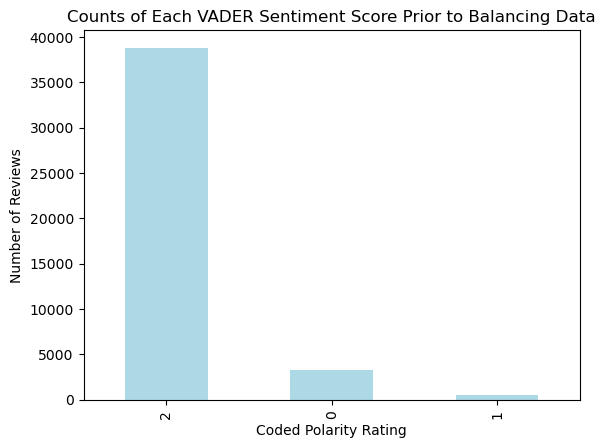

In [63]:
## Graph 5 - Bar Chart of VADER Sentiment Counts for Each Branch

rating_amounts = df['Vader_Rating'].value_counts()
rating_amounts.plot(kind='bar', color='lightblue')
plt.title('Counts of Each VADER Sentiment Score Prior to Balancing Data')
plt.xlabel('Coded Polarity Rating')
plt.ylabel('Number of Reviews')
plt.show()
